<a href="https://colab.research.google.com/github/zhd80/MMIE_CHW01/blob/main/MMIE_CHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Predictions for degree 3: Cars [ 9.94625711 15.16276026 17.74178553 20.17902422 24.97017336], Buses [4.87150168 7.51328731 8.22793174 8.51464343 9.87263942]
Predictions for degree 4: Cars [ 9.95724964 15.17129433 17.74317503 20.17113829 24.95714676], Buses [4.87137341 7.51433676 8.22876191 8.5139789  9.87154835]
Predictions for degree 5: Cars [ 9.95718324 15.17113006 17.74349582 20.17087877 24.95731485], Buses [4.87130409 7.51441485 8.22895485 8.51364785 9.8716796 ]


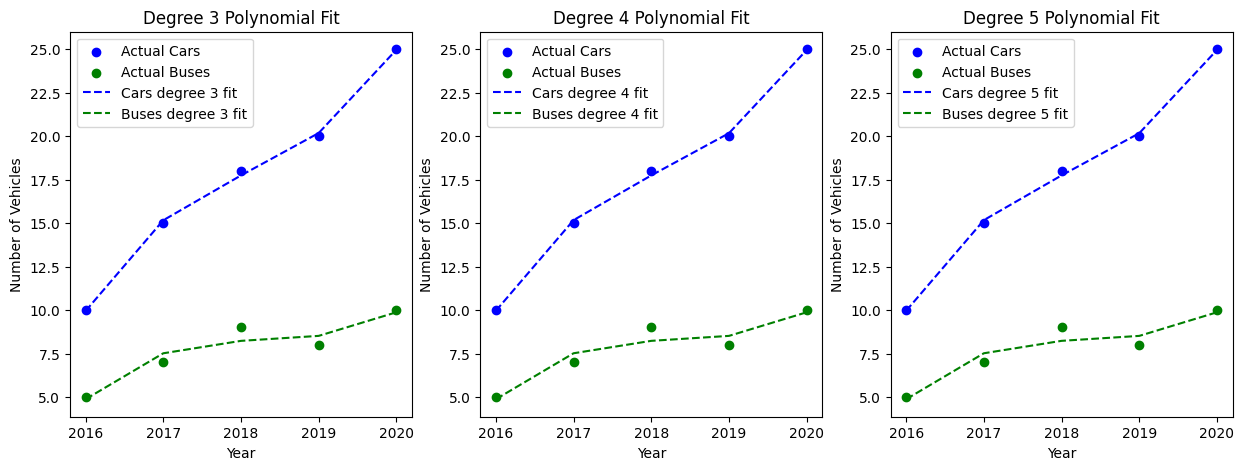

In [2]:
# Code cell
data = {
    'Year': [2016, 2017, 2018, 2019, 2020],
    'Cars': [10, 15, 18, 20, 25],
    'Buses': [5, 7, 9, 8, 10]
}
df = pd.DataFrame(data)

# Define the years for prediction
years_to_predict = np.array([[2016], [2017], [2018], [2019], [2020]])

# Degrees to try
degrees = [3, 4, 5]

# Plot the data and model fit for each degree
plt.figure(figsize=(15, 5))
for i, degree in enumerate(degrees):
    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(df['Year'], df['Cars'], label='Actual Cars', color='b')
    plt.scatter(df['Year'], df['Buses'], label='Actual Buses', color='g')

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(df['Year'].values.reshape(-1, 1))
    predict_poly = poly.fit_transform(years_to_predict)

    # Fit a model for Cars
    model_car = LinearRegression()
    model_car.fit(X_poly, df['Cars'])
    plt.plot(df['Year'], model_car.predict(X_poly), label=f'Cars degree {degree} fit', linestyle='--', color='b')
    car_pred = model_car.predict(predict_poly)

    # Fit a model for Buses
    model_bus = LinearRegression()
    model_bus.fit(X_poly, df['Buses'])
    plt.plot(df['Year'], model_bus.predict(X_poly), label=f'Buses degree {degree} fit', linestyle='--', color='g')
    bus_pred = model_bus.predict(predict_poly)

    plt.title(f"Degree {degree} Polynomial Fit")
    plt.xlabel('Year')
    plt.ylabel('Number of Vehicles')
    plt.legend()

    # Print the predictions
    print(f'Predictions for degree {degree}: Cars {car_pred}, Buses {bus_pred}')

plt.show()

## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [3]:
def load_data(file_name):
    X = np.genfromtxt(file_name, delimiter=',', skip_header=1)
    return X

- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [4]:
def kmeans(X, K, max_iters=100):
    n, d = X.shape

    # Step 1: Initialize centroids randomly from the data points
    initial_indices = np.random.choice(n, K, replace=False)
    M = X[initial_indices, :]

    for _ in range(max_iters):
        # Step 2: Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, None] - M, axis=2)
        U = np.argmin(distances, axis=1)

        # Step 3: Update the centroids as the mean of the assigned data points
        new_M = np.array([X[U == k].mean(axis=0) for k in range(K)])

        # If the centroids don't change, the algorithm has converged
        if np.array_equal(M, new_M):
            break
        M = new_M

    return M, U

- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

In [5]:
def plot_clusters(X, M, U):
    K = M.shape[0]
    colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Add more colors if needed
    markers = ['o', 's', '^', 'D', 'v']  # Add more markers if needed

    plt.figure(figsize=(8, 6))
    for k in range(K):
        cluster_points = X[U == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], marker=markers[k], label=f'Cluster {k+1}')
        plt.scatter(M[k, 0], M[k, 1], c=colors[k], marker='o', edgecolor='k', s=200, label=f'Centroid {k+1}')
        for point in cluster_points:
            plt.plot([point[0], M[k, 0]], [point[1], M[k, 1]], c=colors[k], linestyle='--')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()


**<font color="red"> Don't edit the code in the following cell!</font>**

Saving Image1.csv to Image1.csv


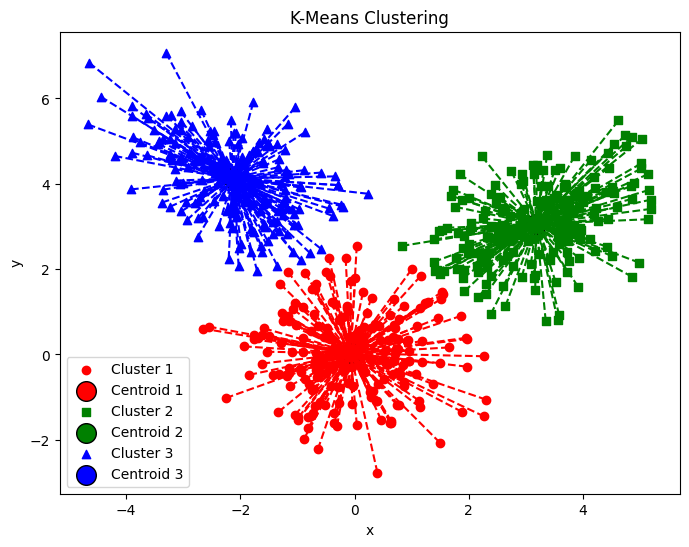

In [7]:
# Evaluation Cell

# Load the data from the file
from google.colab import files
uploaded = files.upload()
data = load_data('Image1.csv')

# Perform K-means clustering
K = 3  # Number of clusters
centroids, assignments = kmeans(data, K)

# Plot the clusters
plot_clusters(data, centroids, assignments)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

In [8]:
def elbow_method(X, K_list):
    SSE = []
    for K in K_list:
        centroids, cluster_assignment = kmeans(X, K)
        cluster_distances = np.sum((X - centroids[cluster_assignment])**2, axis=1)
        SSE.append(np.sum(cluster_distances))
        S=np.array(SSE)
    return S

# the rest of the code...

# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import string

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [11]:
# TODO: First 25 rows of the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('sentiment.csv')


print(df.head(25))

Saving sentiment.csv to sentiment.csv
    PhraseId  SentenceId                                             Phrase  \
0          1           1  A series of escapades demonstrating the adage ...   
1          2           1  A series of escapades demonstrating the adage ...   
2          3           1                                           A series   
3          4           1                                                  A   
4          5           1                                             series   
5          6           1  of escapades demonstrating the adage that what...   
6          7           1                                                 of   
7          8           1  escapades demonstrating the adage that what is...   
8          9           1                                          escapades   
9         10           1  demonstrating the adage that what is good for ...   
10        11           1                            demonstrating the adage   
11        12  

In [12]:
# TODO: Last 10 rows of the dataset
print(df.tail(10))

      PhraseId  SentenceId                                             Phrase  \
9990      9991         419                     this a comedy or serious drama   
9991      9992         419                          a comedy or serious drama   
9992      9993         419                                        a comedy or   
9993      9994         419                                           a comedy   
9994      9995         419                                      serious drama   
9995      9996         420  plays like some corny television production fr...   
9996      9997         420                   plays like some corny television   
9997      9998         420                         like some corny television   
9998      9999         420                              some corny television   
9999     10000         420                                   corny television   

      Sentiment  
9990          2  
9991          2  
9992          2  
9993          2  
9994          2  


In [13]:
# TODO: information of columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    10000 non-null  int64 
 1   SentenceId  10000 non-null  int64 
 2   Phrase      10000 non-null  object
 3   Sentiment   10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB
None


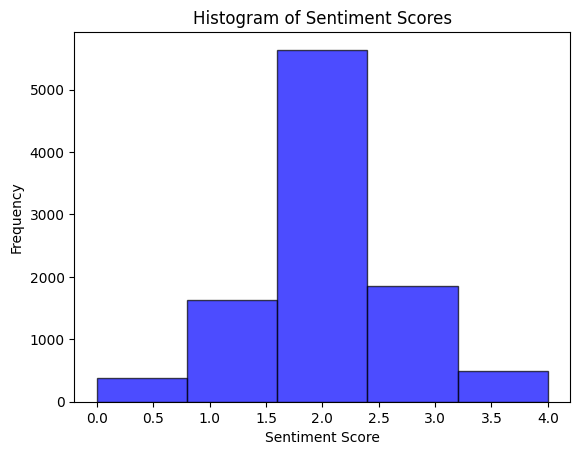

In [14]:
# TODO: histogram of sentiment scores
plt.hist(df['Sentiment'], bins=5, alpha=0.7, color='b', edgecolor='black')

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores')
plt.show()

Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [15]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    # TODO:
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub('[' + string.punctuation + ']', '', text)

    # Tokenize and remove stop words
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]

    text = ' '.join(filtered_tokens)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
# TODO: Apply the preprocessing function to the text column
text = "Hello! This is a sample text, with some punctuation marks and stopwords."

print(preprocess_text(text))


hello sample text punctuation marks stopwords


### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

...

In [18]:
# TODO: Extract features from the preprocessed text data
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Learn the vocabulary and transform the data
X = vectorizer.fit_transform(corpus)

# Get the feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Convert the matrix to an array
X_array = X.toarray()

# Display the feature names and the transformed data
print("Feature Names:", feature_names)
print("Transformed Data:\n", X_array)

Feature Names: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
Transformed Data:
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE)

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [19]:
# TODO: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,X_array , test_size=0.2, random_state=1)


# TODO: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# TODO: Make predictions on the testing set
y_pred = model.predict(X_test)


# TODO: Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 5.8205882763703126e-33


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

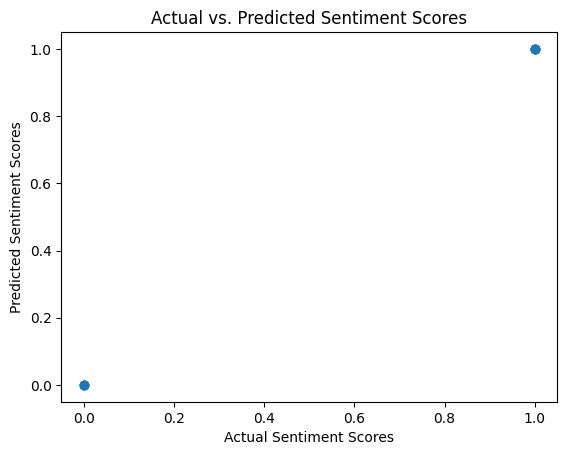

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sentiment Scores")
plt.ylabel("Predicted Sentiment Scores")
plt.title("Actual vs. Predicted Sentiment Scores")
plt.show()

## <font color="red"> Discuss the resulted figure </font>

...

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``